---
layout: post
title:  "Clustering: Flat and Hierarchical"
date:   2023-04-14 10:14:54 +0700
categories: MachineLearning
---
# TOC

- [Introduction](#intro)
- [Flat clustering](#flat)
    - [K-means](#k)
    - [EM](#em)
- [Hierarchical clustering](#hier)
    - [Agglomerative clustering](#agglo)
    - [Divisive clustering](#div)

# Introduction
Clustering is the task of grouping similar entities into clusters so that the group is coherent internally and different across clusters. Clustering is arguably the most common form of unsupervised learning, no expert to label the class. The distribution and structure of data would determine cluster membership. The usual measure in calculating cluster is the distance measure, especially Euclidean distance. Note that other kinds of distance would result in different clustering result. 

There are two main types of clustering approaches: flat clustering and hierarchical clustering. Flat clustering, also known as partitional clustering, produces a single partition of the data into k clusters, where k is a parameter specified by the user. The clusters are mutually exclusive and exhaustive, meaning every data point belongs to exactly one cluster. Popular flat clustering algorithms include k-means, PAM (partitioning around medoids), and CLARA. K-mean is a hard clustering since it assigns cluster in a hard way: each element is a member of a cluster exactly. EM (expectation maximization) gives soft assignment: it gives probability distribution over all clusters and the membership is called fractional. LSI is a soft clustering algorithm.

Flat clustering is useful when you have a clear idea of the number of clusters you want to identify in the data. It produces a single, flat grouping of the data into k clusters of roughly equal size and variance. The advantages of flat clustering are that the results are easy to interpret and the algorithms are typically faster than hierarchical clustering methods.

Hierarchical clustering, on the other hand, produces a hierarchy of clusters organized as a tree. At the top level, all data points are clustered into one group. At the bottom level, each point is its own cluster. By traversing down the tree, you can break the hierarchy into more or less fine-grained clusters. Hierarchical clustering algorithms include agglomerative clustering (bottom-up) and divisive clustering (top-down).

# Flat clustering

Given a set of points $$ D = \{d_1,..d_N\} $$, a number of clusters K, and objective function, we want to compute the assignment $$ \gamma: D \rightarrow {1,...K} $$. This is to minimize the average distance between points and their respective centroids. In other words, the objective function is to maximize the similarity between points and their centroids. In flat clustering, the main problem is to make a good guess on K, and then find a good starting point to reach global optimum. So sometimes we employ external constraints. To measure the quality of clustering process, we have four external criteria: purity, normalized mutual information, Rand index, and F measure. 

## Purity

To calculate purity, each cluster is labeled as the most frequent in the cluster, and then the accuracy of this assignment is measured by counting the correct assignment over N.

$$ purity =  \frac{1}{N} \sum_k max_j \mid w_k \cap c_j \mid $$
 
where w is the cluster and c is the set of points. Good clustering result in purity close to 1 and bad clustering is at 0. However, in the case each point has its own cluster, the purity is also 1 which is bad.

## Normalized mutual information (NMI)

$$ NMI = \frac{I(w, c}{\frac{H(w) + H(c)}{2}} $$

where I is the mutual information.

$$ I = \sum_k \sum_j P(w_k \cap c_j) log \frac{P(w_k \cap c_j)}{P(w_k) P(c_j)} = \sum_k \sum_j \frac{\mid w_k \cap c_j \mid}{N} log \frac{N\mid w_k \cap c_j \mid}{\mid w_k\mid \mid c_j \mid} $$

where $$ P(w_k), P(c_j), P(w_k \cap c_j) $$ are the probabilitis of a point being in cluster $$ w_k $$, class $$ c_j $$ and in the intersection of $$ w_k $$ and $$ c_j $$. The maximum likelihood estimate of each probability is then the corresponding relative frequency.

H is entropy:

$$ H(w) = - \sum_k P(w_k) log P (w_k) = - \sum_k \frac{w_k}{N} log \frac{w_k}{N} $$ where the later equation is the maximum likelihood estimates of probabilities.

The term I(w,c) measures the amount of information increased when we know about the clusters. The minimum is 0 when the clusters are all randomly assigned. The maximum is reached when all the classes are perfectly clustered but also if K = N (each point has its own cluster). This is the same problem as purity. The normalized denominator will help with this issue, since entropy increases with the number of clusters. When H(w) reaches maximum at K=N making NMI low. Since NMI is normalized, we can use this index to compare among clusters. The denominator is also a upper bound on I(w,c) so that NMI is always between 0 and 1.

## Rand index
An alternative to information theory approach is to calculate accuracy:

$$ RI = \frac{TP + TN}{TP + FP + FN + TN} $$

A true positive (TP) assigns two similar points into the same cluster, a true negative assigns two dissimilar points to different clusters. And then there are two type of errors: a FP assigns two dissimilar points to the same cluster. A FN assigns two similar points to different clusters. RI measures the percentage of correctness.

## F measure
In the RI, we weight false positives and false negatives equally. Separating similar points is sometimes worse than putting pairs of dissimilar points together. F measure penalize false negative stronger by having a $$ \beta $$ factor, when $$ \beta > 1 $$, we give more weight to recall than precision.

$$ P = \frac{TP}{TP + FP} $$

$$ R = \frac{TP}{TP + FN} $$

$$ F_{\beta} = \frac{(\beta^2 + 1) PR}{\beta^2 P + R} $$

## k-means

In k-means algorithm, a cluster center is the centroid $$ \vec{\mu} $$ of all points in cluster w:

$$ \vec{\mu}(w) = \frac{1}{\mid w \mid} \sum_{\vec{x} \in w} \vec{x} $$

The measure of how well the centroids represent their members is the residual sum of squares (RSS): the squared distance of each vector from its centroid summed over all vectors:

$$ RSS_k = \sum_{\vec{x} \in w} \mid \vec{x} - \vec{\mu}(w_k) \mid^2 $$

$$ RSS = \sum_{k=1}^{K} RSS_k $$

## k-medoids

K-medoids is a variant of K-means that computes medoids instead of centroids as cluster centers. The medoid of a cluster is the vector that is closest to the centroid.

## Choosing k

When we min RSS, it can happen that RSS is min at K = N (each point is a center). To avoid this, we can find k such that successive decrease in RSS is negligible. And then apply some other external constraint. A second type of criterion is simply to impose a penalty for the number of clusters.

$$ K = argmin_k {[RSS_{min}(K) + \lambda K ]} $$

## Expectation maximization (EM)

EM is a model based and a generalization of K-means. In EM, we assume that there is a model $$ \mu = \{ \vec{\mu_1}, ..\vec{\mu_k} \} $$ generating those data and we would approximate that model. As usual, in maximum likelihood method, we find parameters $$ \mu $$ of the model such that it maximizes the chance that all the data D happen. We can maximize the log of the likelihood:

$$ \mu = argmax_{\mu} L(D \mid \mu) = argmax_{\mu} log \prod_{n=1}^{N} P(d_n \mid \mu) = argmax_{\mu} \sum_{n=1}^{N} log P(d_n \mid \mu) $$

Once we have $$ \mu $$, we can calculate an assignment probabitlity $$ P(d\mid w_k;\mu) $$ for each point-cluster pair. This is called soft clustering since each point has a probability of being in a cluster (a fractional membership). For example, a document about European labor market can have fractional memberships in Europe topic or labor topic, since it contributes equally to the two topics. After the assigning of the data points, we recalculate the parameters.

# Hierarchical clustering

Hierarchical clustering is a type of clustering algorithm used to group similar objects or data points into clusters. In this algorithm, objects are initially assigned to individual clusters, and then the clusters are successively merged or split based on some similarity metric until a stopping criterion is met. The result is a dendrogram, which is a tree-like diagram that shows how the objects are grouped into clusters at different levels of similarity.

There are two types of hierarchical clustering: agglomerative (bottom up merging) and divisive (top down division). Agglomerative clustering starts with each object in a separate cluster and then merges the most similar clusters until all the objects belong to a single cluster. Divisive clustering starts with all the objects in a single cluster and then recursively splits the cluster into smaller sub-clusters until each object is in its own cluster.

## Hierarchical agglomerative clustering (HAC)

Bottom up algorithms treat each point as a singleton cluster then then successively merge (agglomerate) them until all have been merged into a single cluster containing all documents. The merge happens when the two points have a good similarity measure (combination similarity). The combination similarity of a singleton cluster is with itself (which is 1.0 for cosine similarity). When we need a partition of disjoint clusters like in flat clustering, we cut the hierarchical clustering at some similarity point. 

In agglomerative, we have four different algorithms, differing in the similarity measures they use: single link, complete link, group average, and centroid similarity. 

### Single link and complete link clustering
In single link clustering, the similarity between two clusters is the similarity of their most similar members. In complete link clustering, the similarity between two clusters is the similarity of their most dissimilar members. A measurement based on one pair cannot fully reflect the distribution of data in each cluster though. Single link method tends to lead to chaining, a chain of points be extended for long distance disregarding the overall shape of the cluster. The complete link method has its problems. It pays too much attention to outliers.


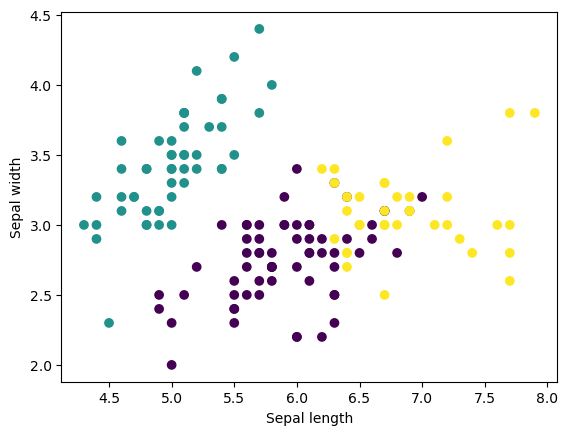

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data

# Perform hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=agg_clustering.labels_)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


![23Clustering_1_0](https://user-images.githubusercontent.com/7457301/232026846-6c41b8c8-1cde-4e2d-9e32-d6724a530dbd.png)


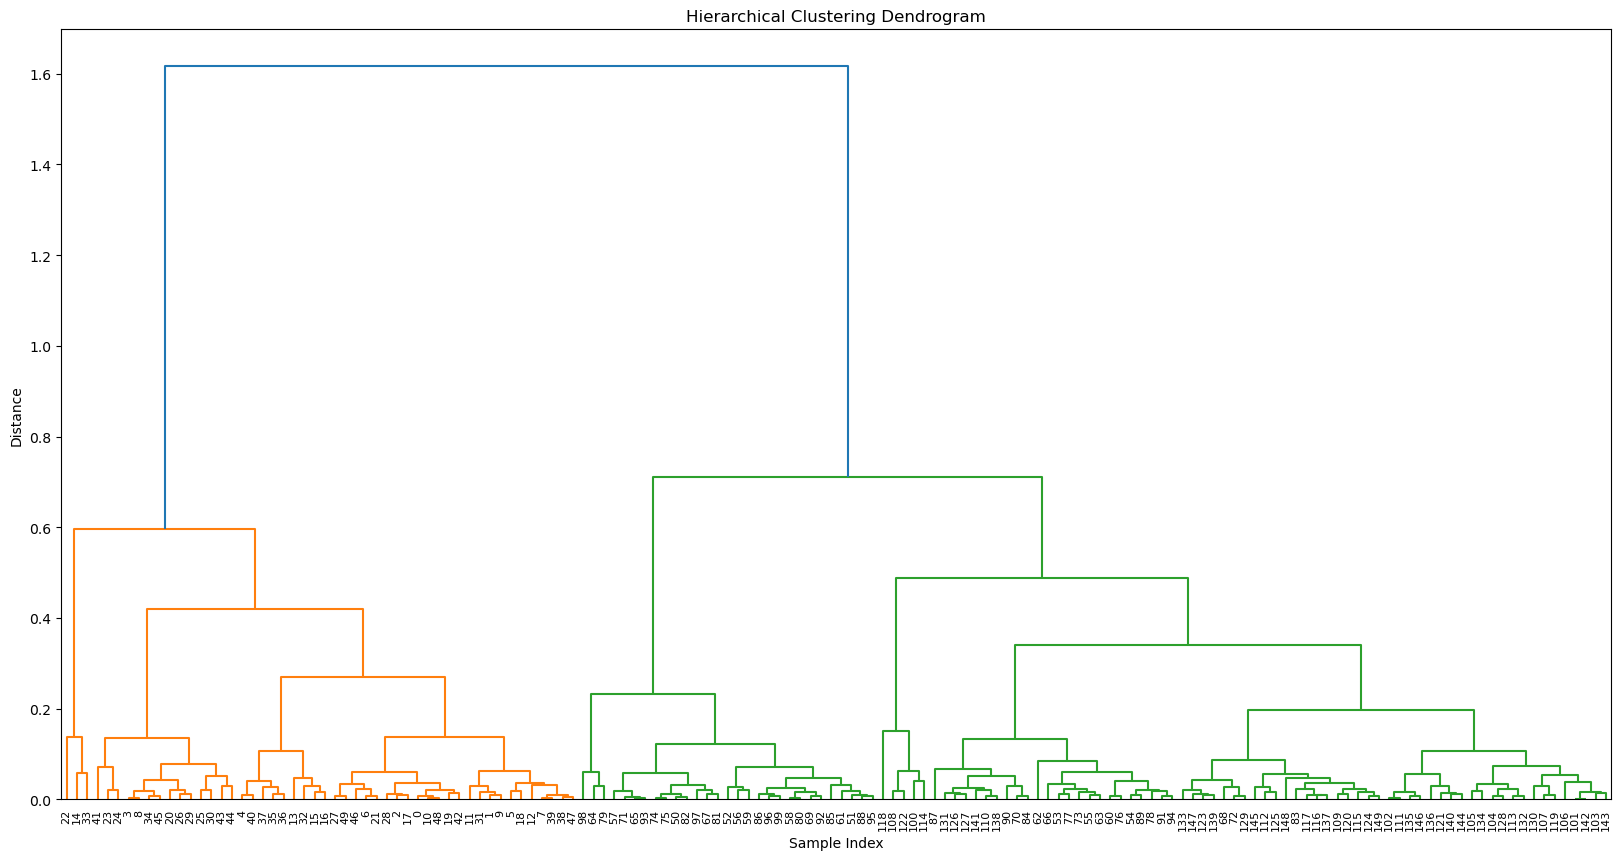

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
dist = 1 - cosine_similarity(X)
linkage_matrix = linkage(dist, method='complete')

plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8.)
plt.show()

![23Clustering_2_0](https://user-images.githubusercontent.com/7457301/232026859-cc9f3f89-0bd7-4248-89f9-da2a4c2e069a.png)

If we cut at similarity of around 0.7, we would have 3 clusters.

### Group average agglomerative clustering (GAAC)

Group average agglomerative clustering (GAAC) can do better than both single link and complete link method, since it pays attention to all similarities between clusters. It is also called average link clustering. 

$$ GAAC(w_i,w_j) = \frac{1}{(N_i + N_j)(N_i + N_j - 1)} \sum_{d_m \in w_i \cup w_j} \sum_{d_n \in w_i \cup w_j} \vec{d_m} . \vec{d_n} $$

where $$ \vec{d} $$ is the length normalized vector of point d, $$ N_i, N_j $$ are the number of points in clusters $$ w_i, w_j $$. The main thing in GAAC is that it chooses the next merge so that the resulting cluster $$ w_k = w_i \cup w_j $$ is coherent. To judge the coherence of the new cluster $$ w_k $$, we look at all point similarities within it:

$$ \sum_{d_m \in w_i} \sum_{d_n \in w_j} (\vec{d_m} . \vec{d_n}) = ( \sum_{d_m \in w_i} \vec{d_m} ) . (\sum_{d_n \in w_j} \vec{d_n}) $$

The average similarities between $$ w_i, w_j $$ is then:

$$ GAAC(w_i, w_j) = \frac{1}{(N_i + N_j)(N_i + N_j - 1)} {[ (\sum_{d_m \in w_i \cup w_j} \vec{d_m})^2 - (N_i + N_j)]} $$

### Centroid clustering

In centroid clustering, the similarity of two clusters is defined as the similarity of their centroids:

$$ Sim(w_i, w_j) = \vec{\mu}(w_i) . \vec{\mu}(w_j) = (\frac{1}{N_i} \sum_{d_m \in w_i} \vec{d_m}) . ( \frac{1}{N_j} \sum_{d_n \in w_j} \vec{d_n}) = \frac{1}{N_i N_j} \sum_{d_m \in w_i} \sum_{d_n \in w_j} \vec{d_m} . \vec{d_n} $$

The centroid similarity is the average similarity of all pairs of points from different clusters. In GAAC, we consider also the similarities of points in the same cluster.

For a clustering method $$ w = \{w_1,..w_K\} $$, we can define the combination similarity of it to be the smallest combination similarity of its clusters $$ Sim(\{w_1,..w_k\}) = min_k Sim(w_K) $$. And a clustering is optimal if any clustering k < K ends up having less similarity $$ \mid w' \mid \leq \mid w \mid \Rightarrow Sim(w') \leq Sim(w) $$.

## Divisive clustering

A divisive algorithm starts from the top and then divides the data into clusters as they go down, til each point has its own cluster. The process is recursive. One way of doing it could be:

- Starting with a single cluster containing all data points.

- Find the cluster with maximum internal distance between points. Split this cluster into two smaller clusters.

- Repeat the process til there are no further split.

<img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/Screen%20Shot%202023-02-13%20at%209.10.33%20AM.png">